# MDI 720 : Statistiques
## SVD
### *Joseph Salmon*

This notebook reproduces the pictures for the course "SVD"

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from os import mkdir, path
from sklearn import decomposition
import time

%matplotlib notebook

/home/jo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Plot initialization


In [2]:
dirname = "../prebuiltimages/"
if not path.exists(dirname):
    mkdir(dirname)

imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
plt.close("all")

# Saving display function

In [3]:
saving = True


def my_saving_display(fig, dirname, filename, imageformat):
    """"Saving with personal function."""
    filename = filename.replace('.', 'pt')  # remove "." to avoid floats issues
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)

# Compare 

In [4]:
X = np.random.randn(9, 6)

# Full SVD
U, s, V = np.linalg.svd(X, full_matrices=True)
U.shape, V.shape, s.shape
S = np.zeros((9, 6), dtype=float)
S[:6, :6] = np.diag(s)

# test to numerical precision if 2 arguments are equal
print(np.allclose(X, U.dot(S.dot(V))))

# Partial SVD
U, s, V = np.linalg.svd(X, full_matrices=False)
U.shape, V.shape, s.shape
S = np.diag(s)  # reshape to get a diagonal matrix

# test to numerical precision if 2 arguments are equal
print(np.allclose(X, U.dot(S.dot(V))))

True
True


# SVD/OLS (un)stability

<IPython.core.display.Javascript object>


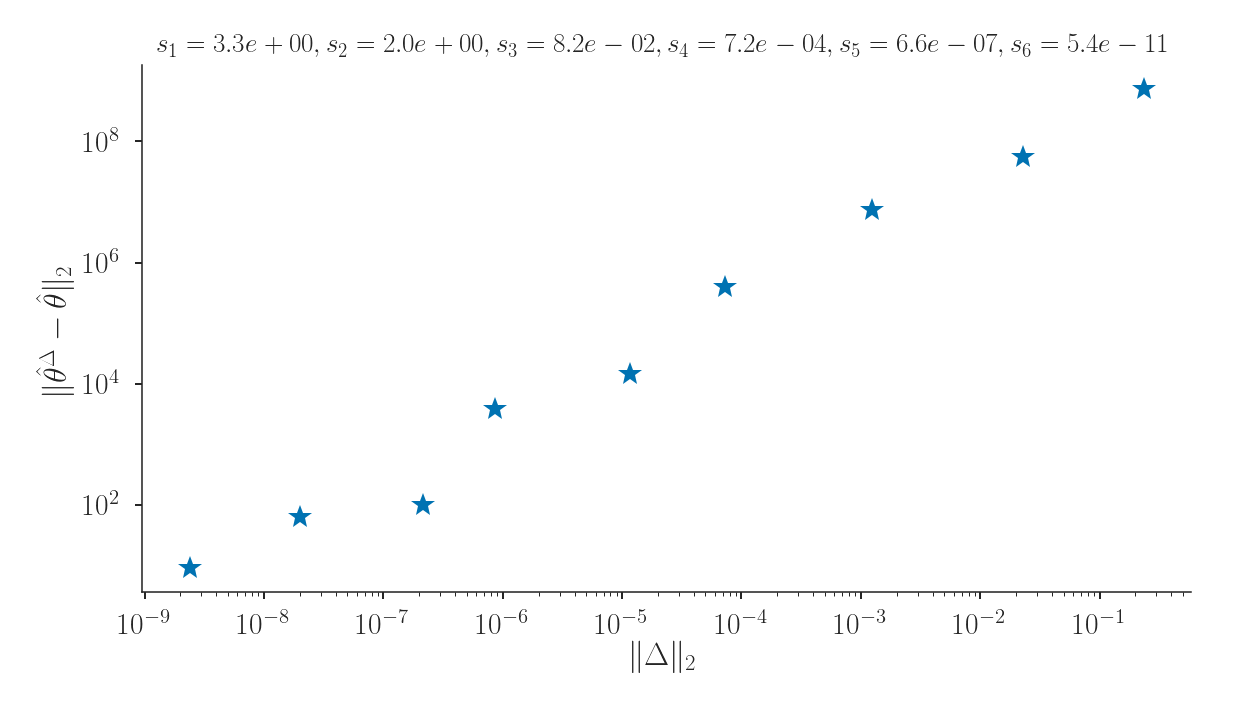

In [13]:
n_features = 6
n_samples = 10
x = 10. ** (-np.arange(n_samples,))
X = (np.column_stack([x ** (i) for i in range(n_features)]))
U, s, V = np.linalg.svd(X, full_matrices=False)
theta_true = np.ones([n_features, ])
y_true = np.dot(X, theta_true)
err = np.zeros(n_samples,)
err_delta = np.zeros(n_samples,)
for i in range(1, n_samples):
    delta = 10. ** (-i) * (0.5 - np.random.rand(n_samples, )) * y_true
    y = y_true + delta
    w = np.dot(np.transpose(U), y)
    theta_hat = np.dot(V, w / s)
    err[i] = np.sqrt(np.sum((theta_hat - theta_true) ** 2))
    err_delta[i] = np.sqrt(np.sum(delta ** 2))

sns.set_context("poster", font_scale=1.5)
sns.set_style("ticks")
fig1 = plt.figure(figsize=(14, 8))
ax1 = fig1.add_subplot(111)
ax1.plot(err_delta, err, '*', markersize=20)
ax1.set_yscale('log')
ax1.set_xscale('log')
sns.despine()
ax1.set_xlabel(r"$\|\Delta\|_2$")
ax1.set_ylabel(r"$\|\hat\theta^{\Delta}-\hat\theta\|_2$")
plt.title(r"$s_1={0: .1e}, s_2={1:.1e}, s_3={2:.1e}, s_4={3: .1e}, s_5={4: .1e}, s_6={5: .1e}$".format(s[0], s[1], s[2], s[3], s[4], s[5]), fontsize=22)
plt.tight_layout()
plt.show()

filename = "amplification_erreur"
image_name = dirname + filename + imageformat
fig1.savefig(image_name)